# The Seasonal-Trend decomposition using LOESS

This code comes from [`PySDKit`](https://github.com/wwhenxuan/PySDKit) by [`changewam`](https://github.com/changewam).

RB C. STL: A seasonal-trend decomposition procedure based on loess[J]. J Off Stat, 1990, 6: 3-73.

STL uses LOESS (locally estimated scatterplot smoothing) to extract smooths estimates of the three components.
The key inputs into STL are:

- season - The length of the seasonal smoother. Must be odd.
- trend - The length of the trend smoother, usually around 150% of season. Must be odd and larger than season.
- low_pass - The length of the low-pass estimation window, usually the smallest odd number larger than the periodicity of the data.

The STL algorithm performs smoothing on the time series using LOESS in two loops; the inner loop iterates between seasonal and trend smoothing and the outer loop minimizes the effect of outliers. During the inner loop, the seasonal component is calculated first and removed to calculate the trend component. The remainder is calculated by subtracting the seasonal and trend components from the time series.

The three components of STL analysis relate to the raw time series as follows:
$$
y_i = s_i + t_i + r_i
$$
where, $y_i$ is the value of the observed time series. $s_i$, $t_i$ and $r_i$ are the seasonal, trend and remainder component.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from S2Generator import Excitation

# Building a general interface to stimulate time series data generation
excitation = Excitation()  # Leave blank to use default parameters

# Generate the excitation time series
time_series = excitation.generate(
    rng=np.random.RandomState(0), n_inputs_points=512, input_dimension=1
)[:, 0]

print("The shape of the time series is:", time_series.shape)

The shape of the time series is: (512,)


In [2]:
from S2Generator.utils import STL

# Create the instance for STL
stl = STL(period=3)

# Run the decomposition with `fit_transform`
stl_results = stl.fit_transform(time_series)

str(stl_results)

'STLResult: attribute={observed, seasonal, trend, resid, weights}'

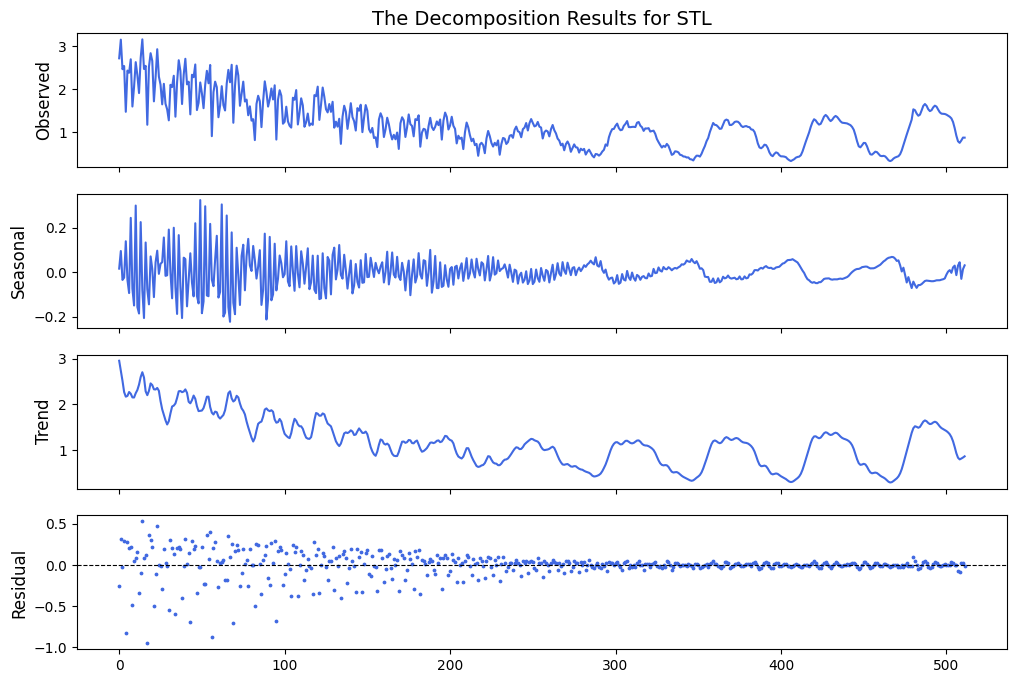

In [3]:
# Visualize the time series and the decomposition results
fig, ax = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

ax[0].plot(time_series, color="royalblue")
ax[0].set_ylabel("Observed", fontsize=12)
ax[1].plot(stl_results.seasonal, color="royalblue")
ax[1].set_ylabel("Seasonal", fontsize=12)
ax[2].plot(stl_results.trend, color="royalblue")
ax[2].set_ylabel("Trend", fontsize=12)
ax[3].scatter(np.arange(0, 512), stl_results.resid, color="royalblue", s=3)
ax[3].axhline(0, color="k", linestyle="--", linewidth=0.8)
ax[3].set_ylabel("Residual", fontsize=12)

ax[0].set_title("The Decomposition Results for STL", fontsize=14)

fig.savefig("../images/stl_decomposition_results.jpg", dpi=500, bbox_inches="tight")

From the results in the figure, it is obvious that the STL algorithm can decompose a one-dimensional time series into different trends, cycles and irregular residual components.